### <center> Yousef Ibrahim Gomaa Mahmoud </center>
---
#### Session 7 - House Data Linear Regression

In [599]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [600]:
df = pd.read_csv('kc_house_data.csv')

#### Data Exploration

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [602]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2702,7555220140,20140916T000000,675000.0,4,2.75,2240,8937,1.0,0,0,...,8,1460,780,1976,0,98033,47.6495,-122.194,2360,9038
18776,4147200040,20150414T000000,1085000.0,5,2.25,3650,13068,1.0,0,0,...,10,1850,1800,1976,0,98040,47.5458,-122.231,2760,13927
16007,9826700726,20141006T000000,505000.0,3,2.50,1995,1483,3.0,0,0,...,8,1760,235,2005,0,98102,47.6025,-122.310,1520,1173
7359,8961950250,20140915T000000,384000.0,5,2.75,3220,8160,2.0,0,0,...,9,3220,0,1999,0,98001,47.3154,-122.254,2876,11521
12587,8682220150,20140606T000000,835000.0,2,2.00,2280,6815,1.0,0,0,...,8,2280,0,2002,0,98053,47.7103,-122.027,2280,6750
1146,3905100520,20141029T000000,510000.0,3,2.50,1860,3658,2.0,0,0,...,8,1860,0,1994,0,98029,47.5703,-122.004,1840,3739
4721,1517900100,20141021T000000,499000.0,4,2.50,2680,10590,2.0,0,0,...,8,2680,0,2004,0,98019,47.7377,-121.970,2330,5566
1323,273900030,20141020T000000,267500.0,3,1.50,1600,9072,1.0,0,0,...,7,1600,0,1963,0,98030,47.3737,-122.216,1710,8000
11382,5530000030,20150126T000000,233000.0,4,2.00,2130,9579,1.0,0,0,...,7,1250,880,1968,0,98001,47.3069,-122.271,1590,9800
10217,9346700030,20150223T000000,685000.0,4,2.00,2260,10800,1.0,0,0,...,9,2260,0,1978,0,98007,47.6124,-122.153,2650,9900


In [603]:
df.drop(['id', 'date', 'zipcode'], axis=1, inplace=True)

In [604]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [605]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


In [606]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [607]:
df.duplicated().sum()

5

In [608]:
df.drop_duplicates(inplace=True)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>, <Axes: >, <Axes: >]],
      dtype=object)

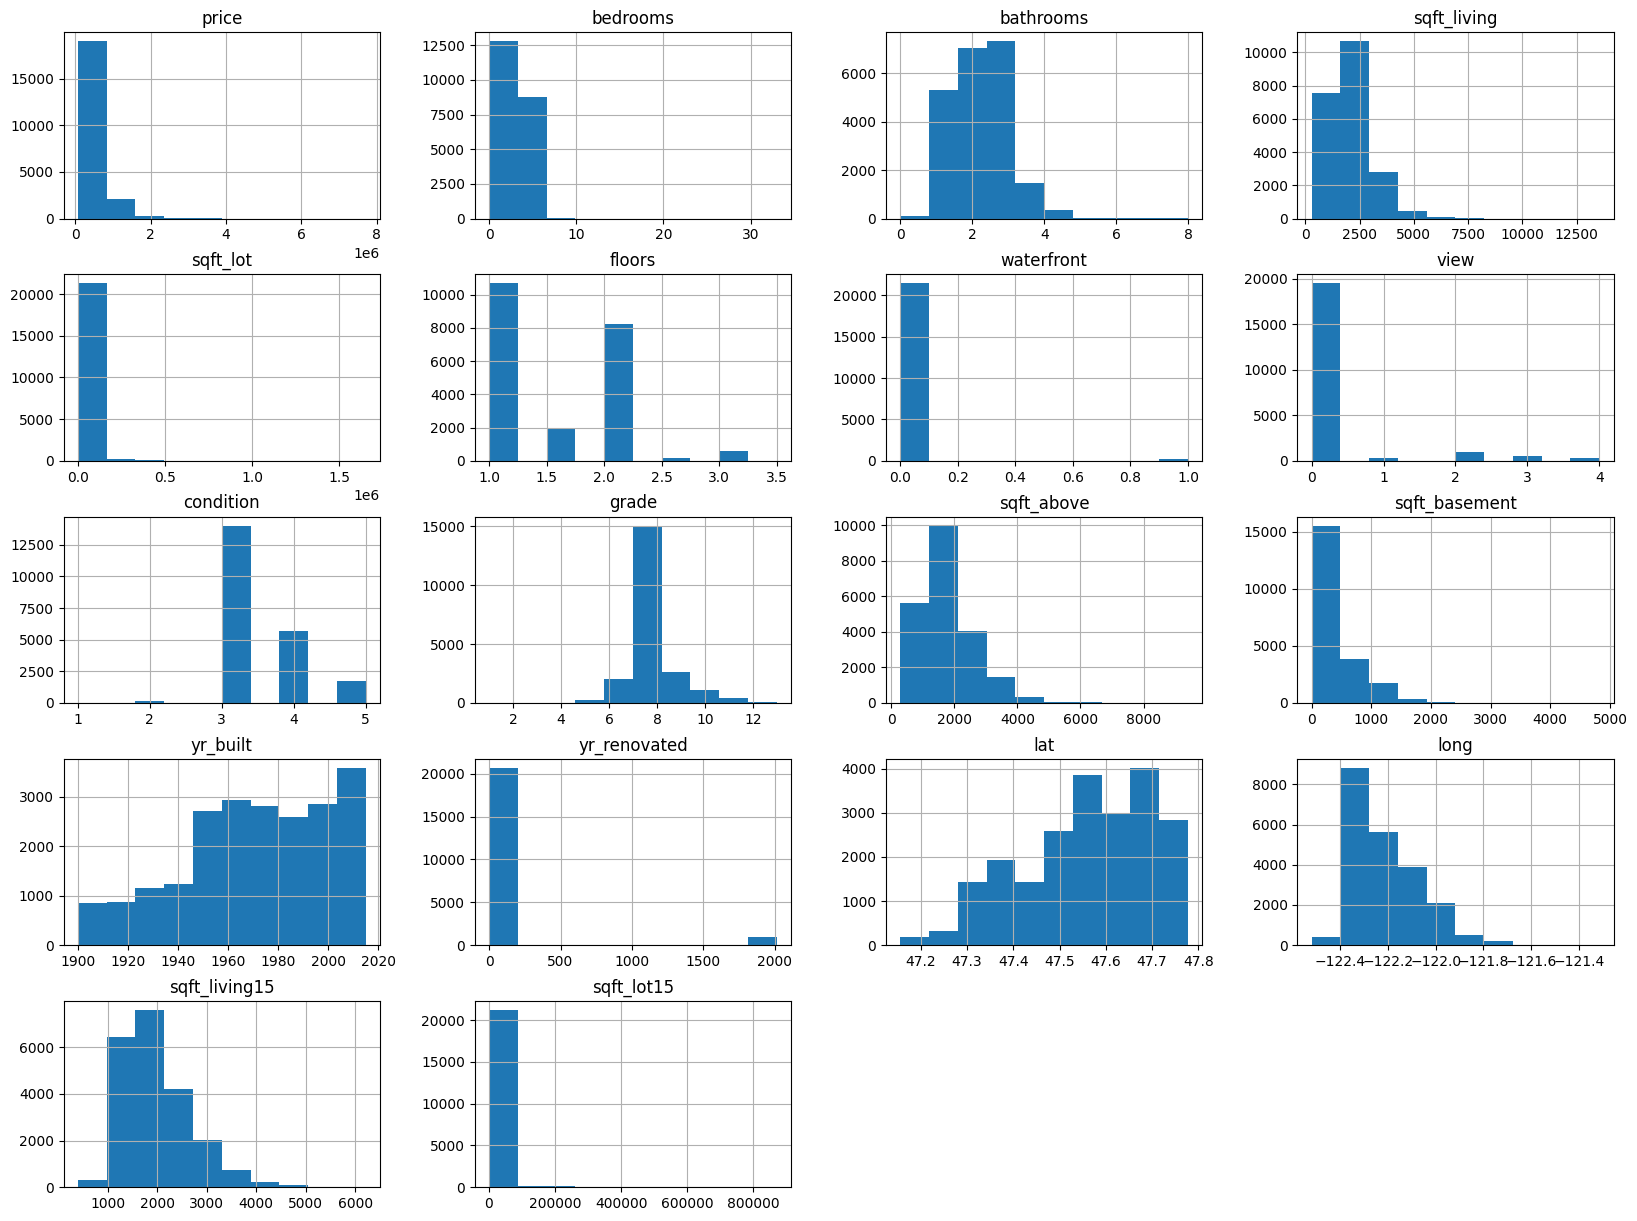

In [609]:
df.hist(bins=10, figsize=(20, 15))

In [610]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667541
sqft_above       0.605559
sqft_living15    0.585378
bathrooms        0.525146
view             0.397409
sqft_basement    0.323839
bedrooms         0.308326
lat              0.307002
waterfront       0.266371
floors           0.256893
yr_renovated     0.126489
sqft_lot         0.089652
sqft_lot15       0.082435
yr_built         0.054062
condition        0.036345
long             0.021587
Name: price, dtype: float64

In [611]:
df['yr_renovated'].value_counts()

yr_renovated
0       20695
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

#### Remarks:
* All of the data is numerical (or label-encoded categorical).
* Too many of the 'yr_renovated' and 'waterfront' data are empty or imbalanced (~0), which are not useful for the model.

In [612]:
df.drop(['yr_renovated', 'waterfront'], axis=1, inplace=True)

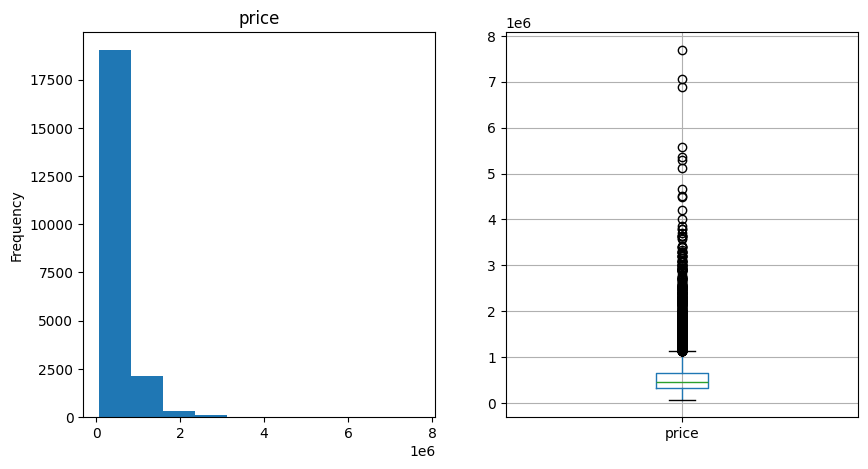

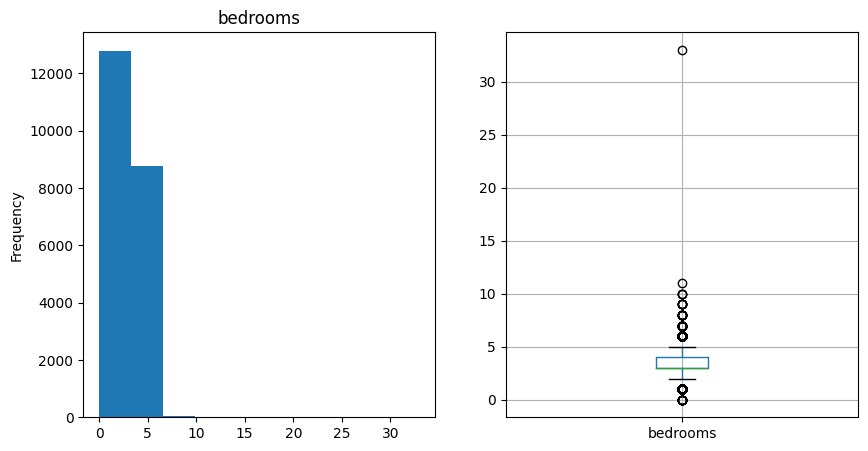

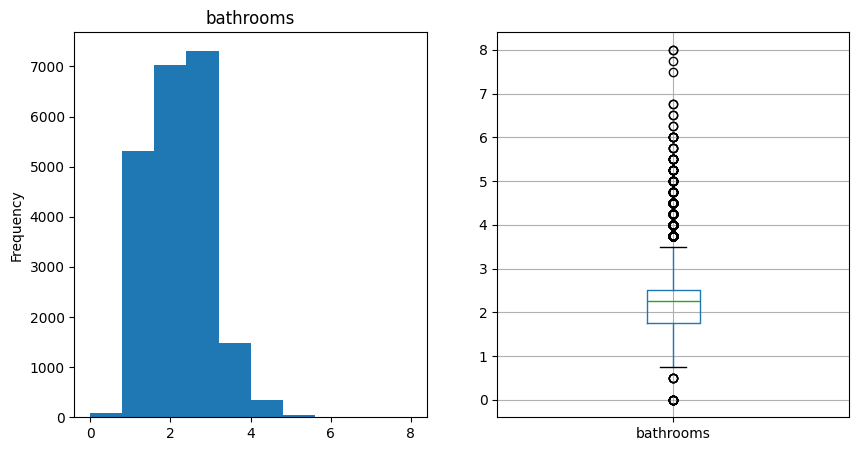

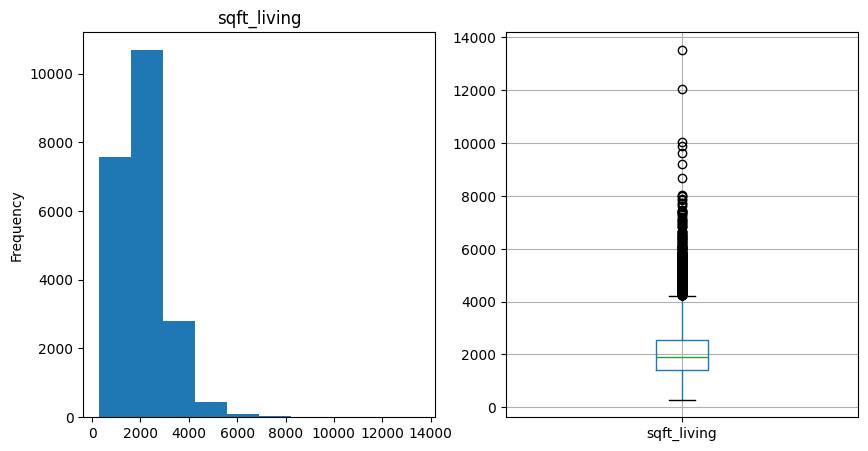

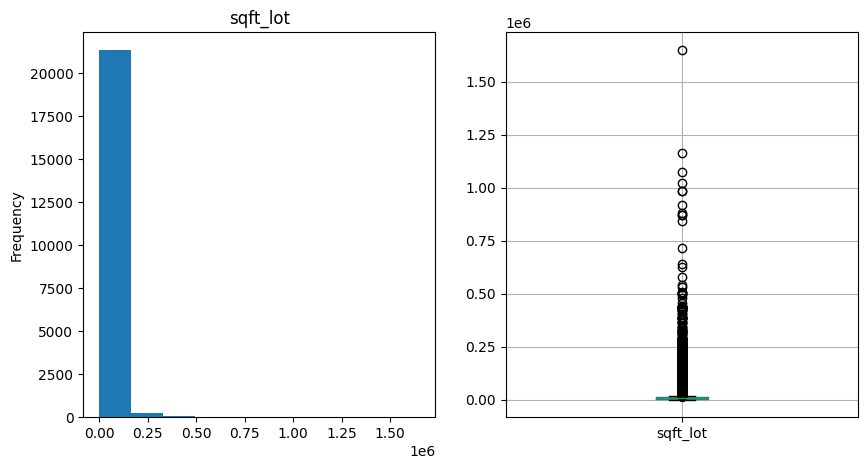

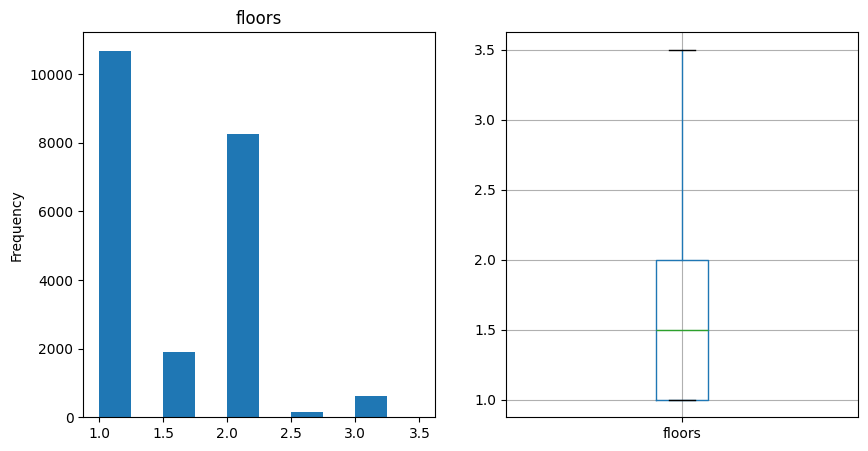

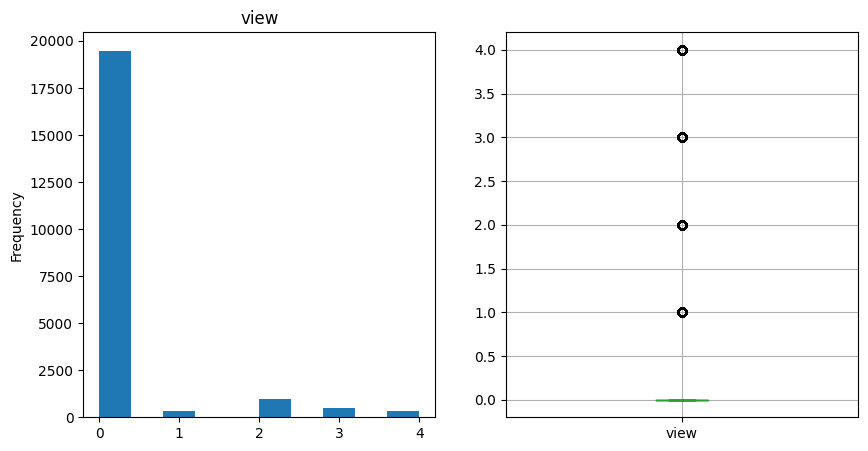

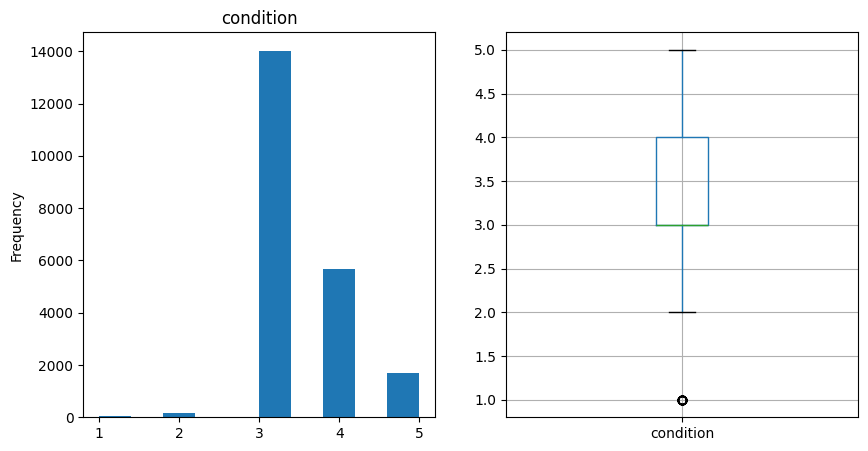

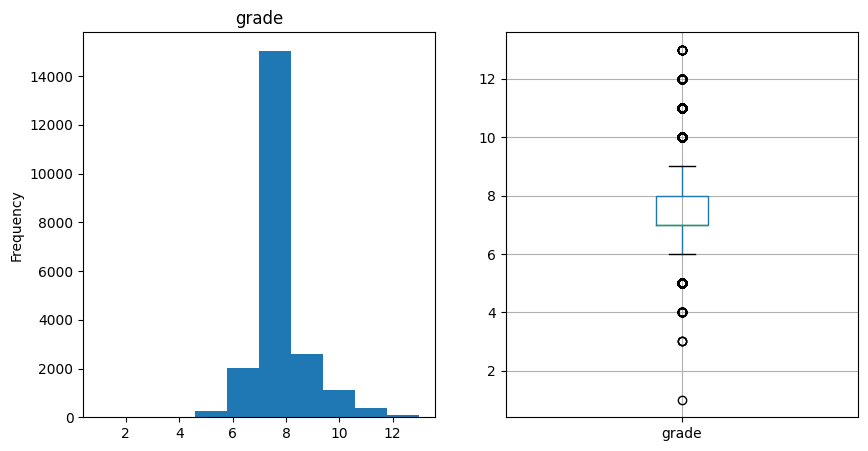

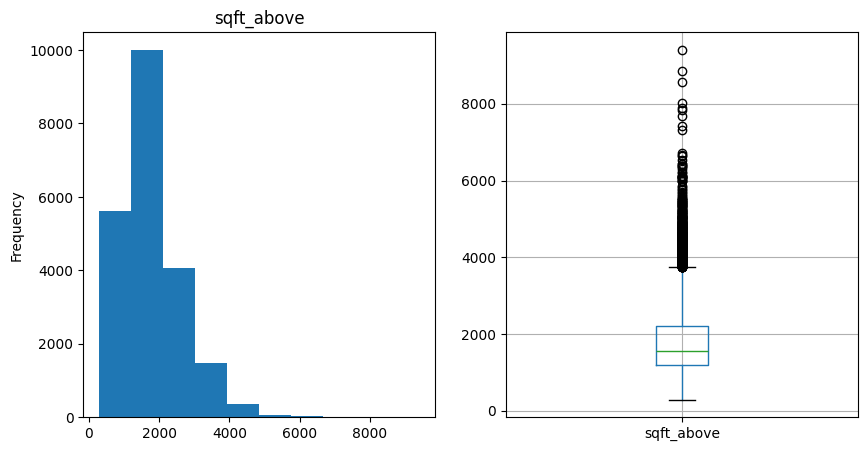

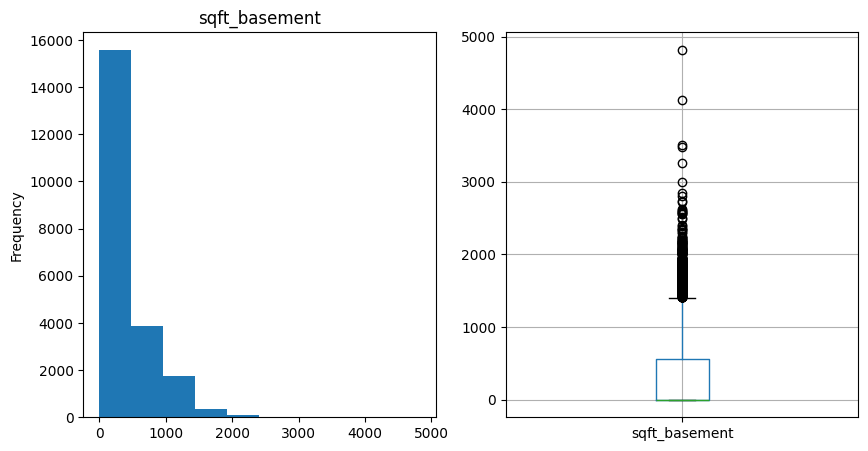

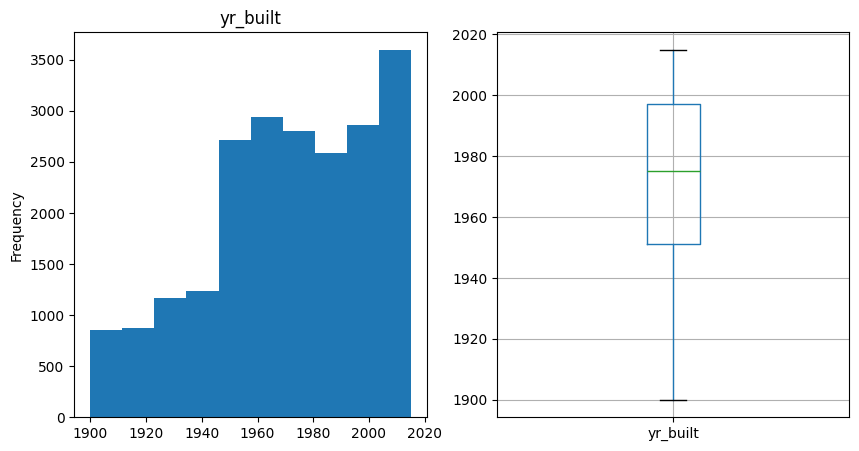

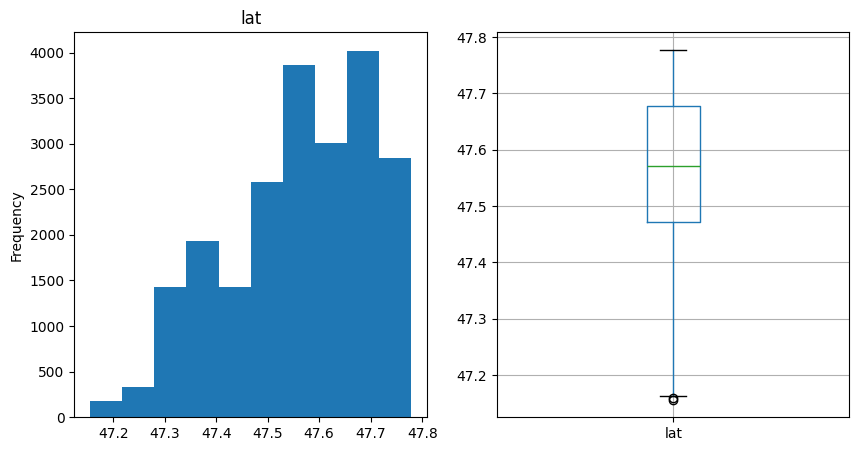

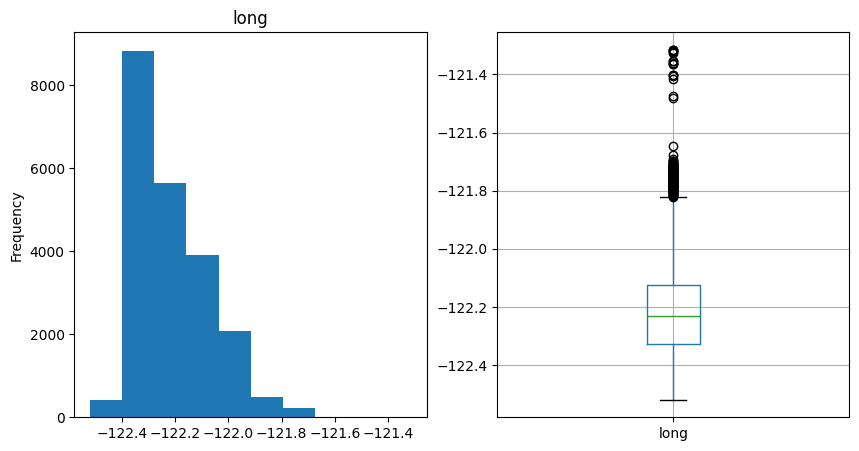

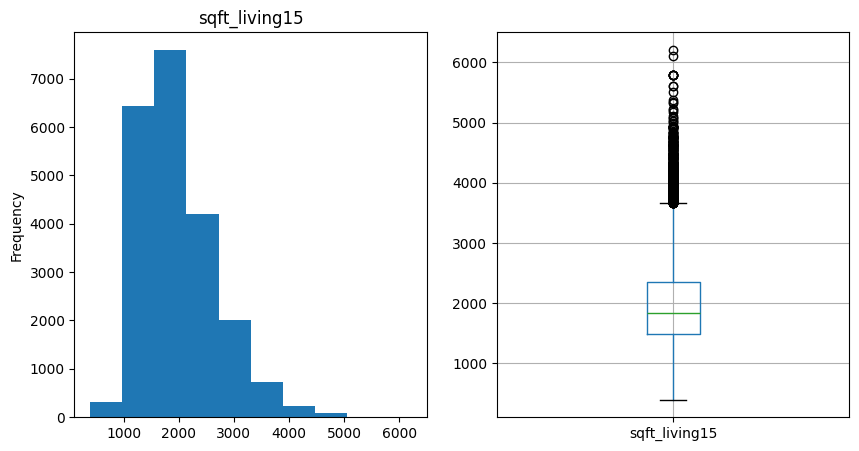

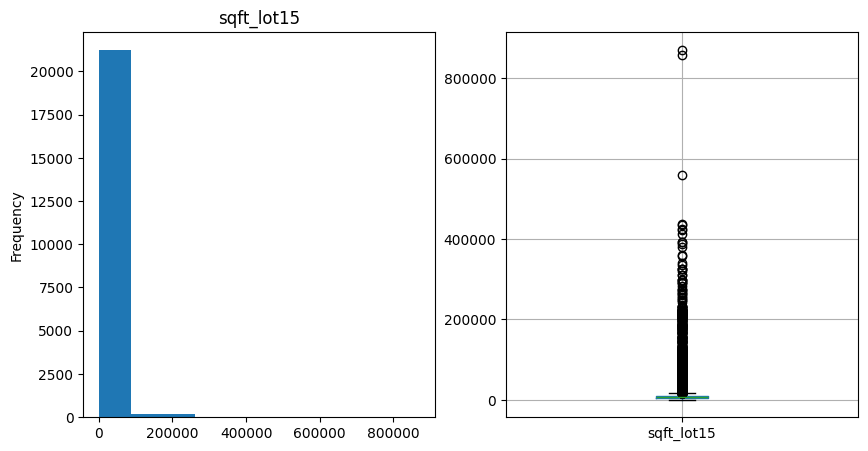

In [613]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    df[col].plot(kind='hist')
    plt.title(col)
    plt.subplot(1, 2, 2)
    df.boxplot([col])
    plt.show()

#### Remarks:
* There are clear outliers and misdistributed data, but for now we will try the model without removing them.

#### Single-feature Linear Regressor

In [614]:
x = df['sqft_living'].values.reshape(-1, 1)
y = df['price'].values

In [615]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 43)

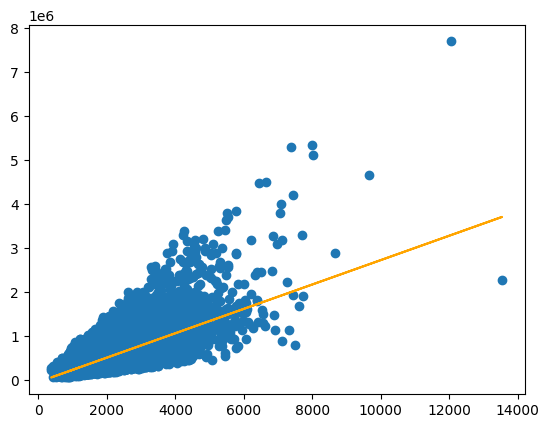

In [616]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color = 'orange')

In [617]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 172182.87441829333
Mean Squared Error: 69242989016.40656
Root Mean Squared Error: 263140.6259329915
R2 Score: 0.4982598711546087


#### Multi-feature Linear Regressor

In [618]:
x = df.drop('price', axis=1).values
y = df['price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 43)

regressor2 = LinearRegression()
regressor2.fit(x_train, y_train)

y_pred = regressor2.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 127737.86533541171
Mean Squared Error: 45175957091.46593
Root Mean Squared Error: 212546.36456892395
R2 Score: 0.6726514719574668


#### Improving R2 Score

In [619]:
# Log transformation on right-skewed distributions & outlier removal
for col in ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']:
    if col in ['long']:
        # applying translation on negative values such as longitude
        df[col] = np.log1p(df[col] - df[col].min())
    else:
        df[col] = np.log1p(df[col])
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df = df[(df[col] > q1 - 1.5 * iqr) & (df[col] < q3 + 1.5 * iqr)]

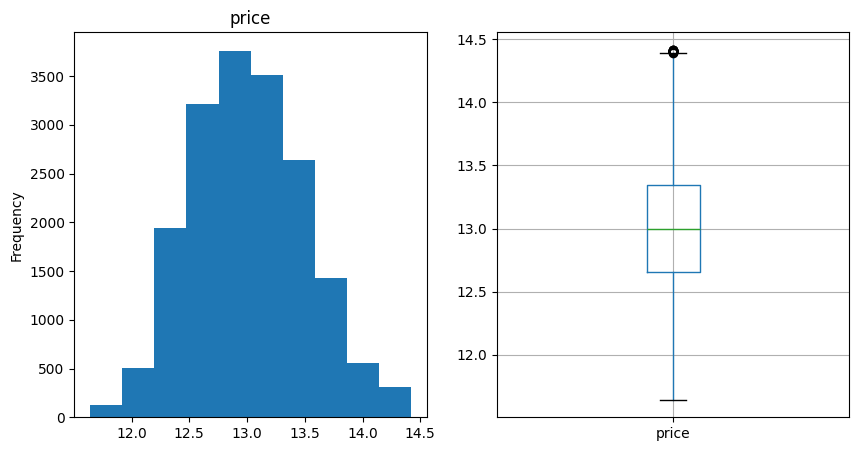

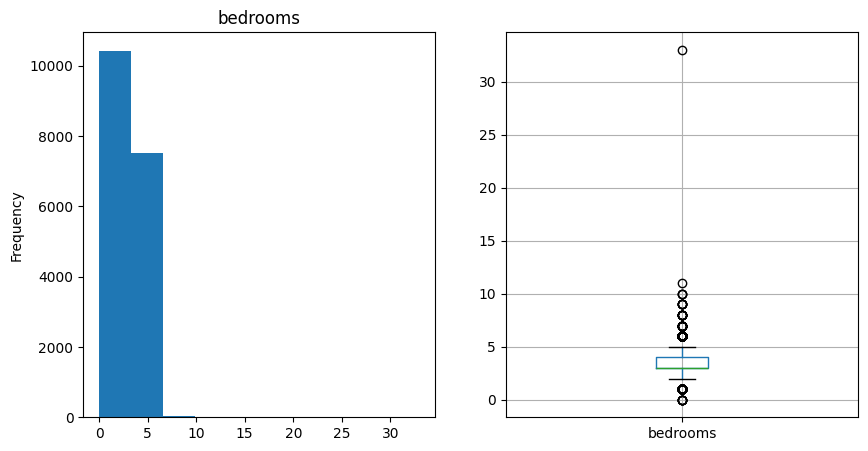

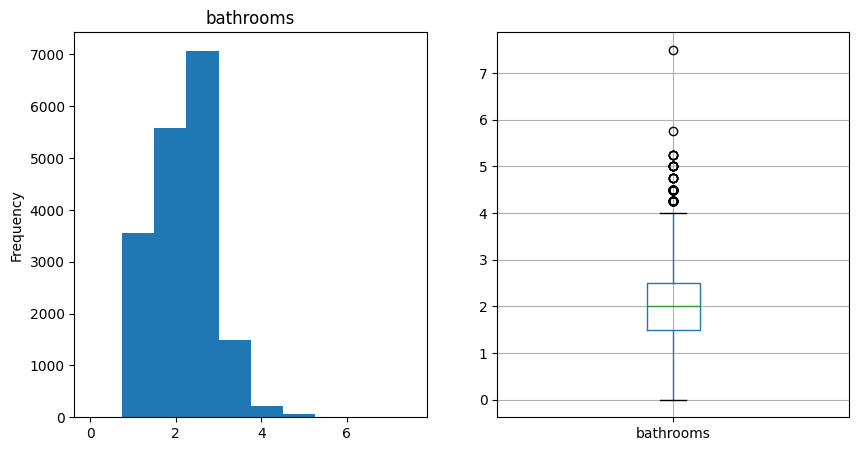

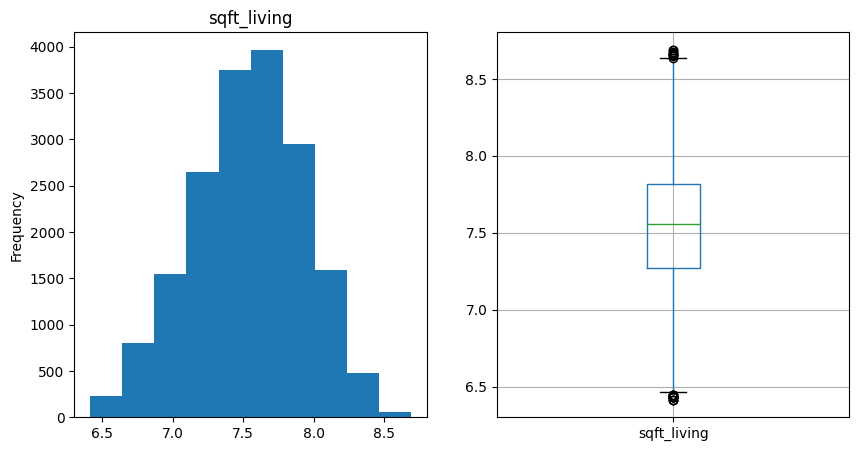

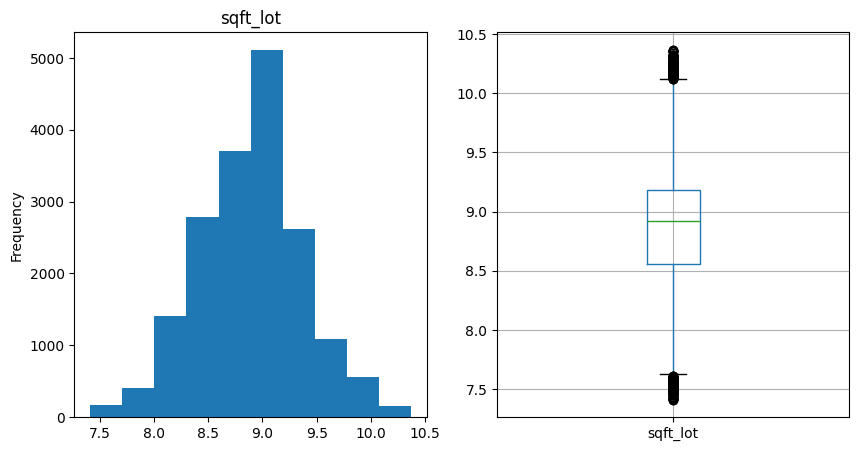

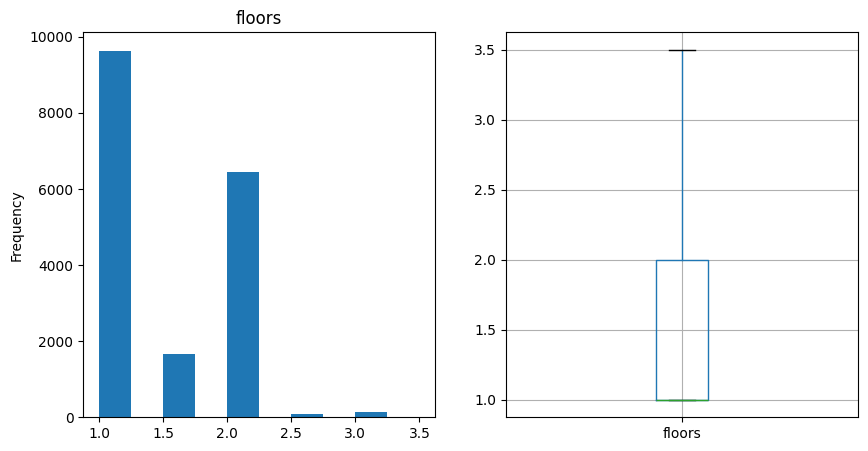

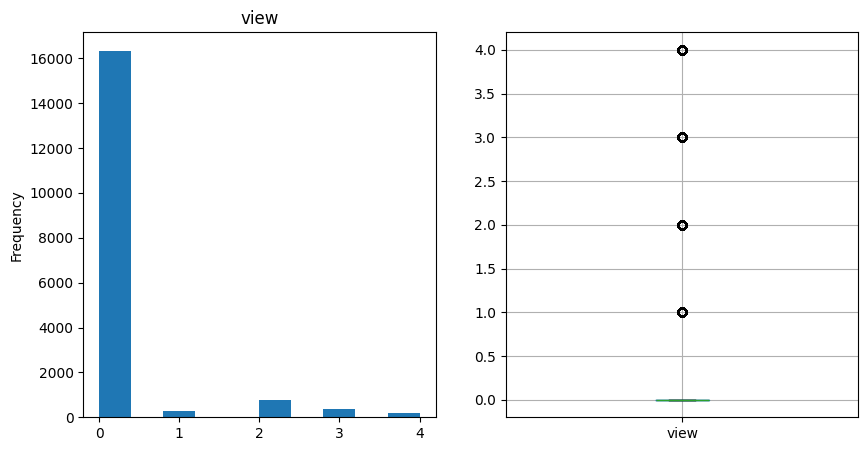

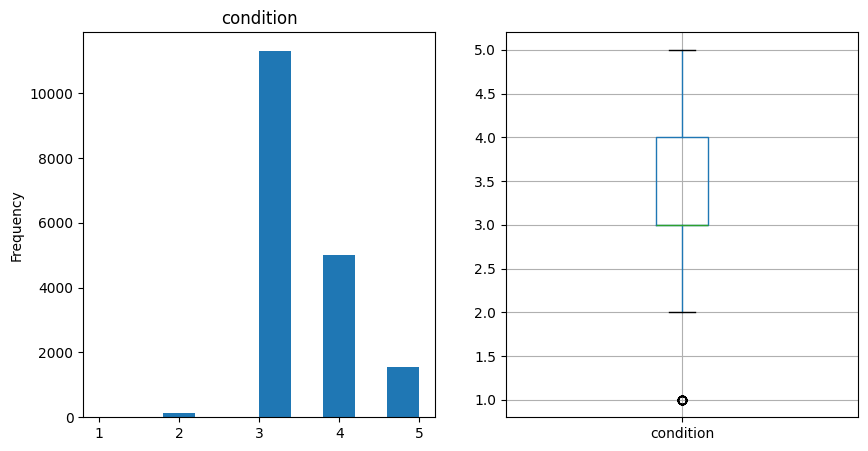

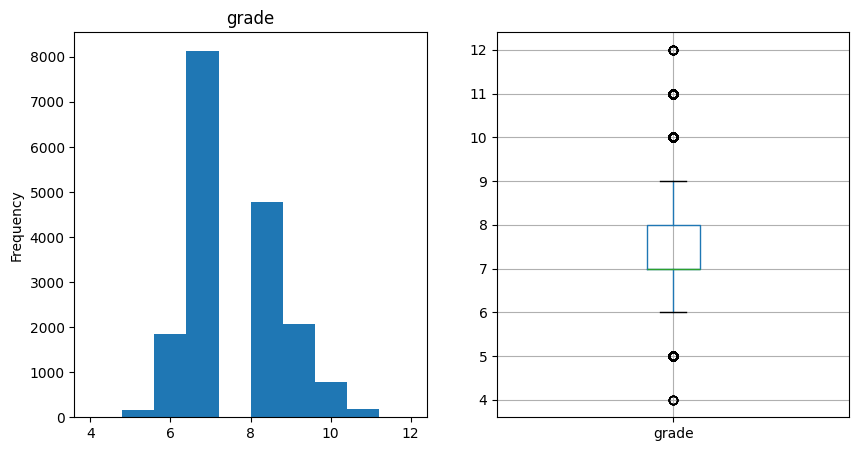

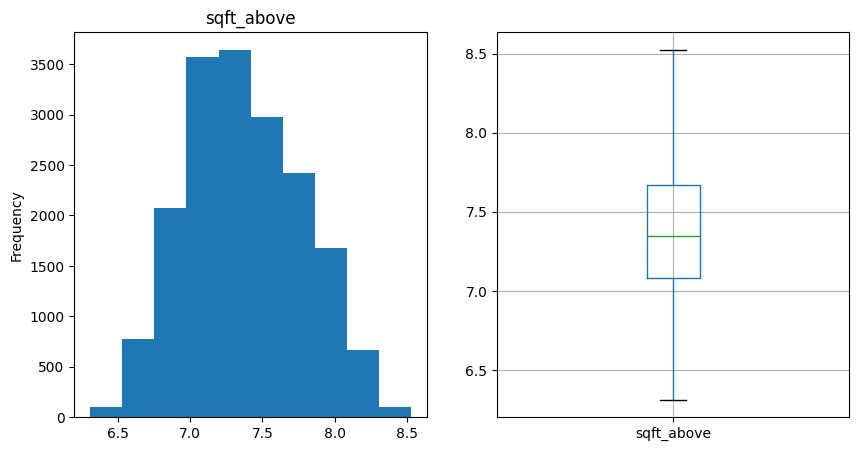

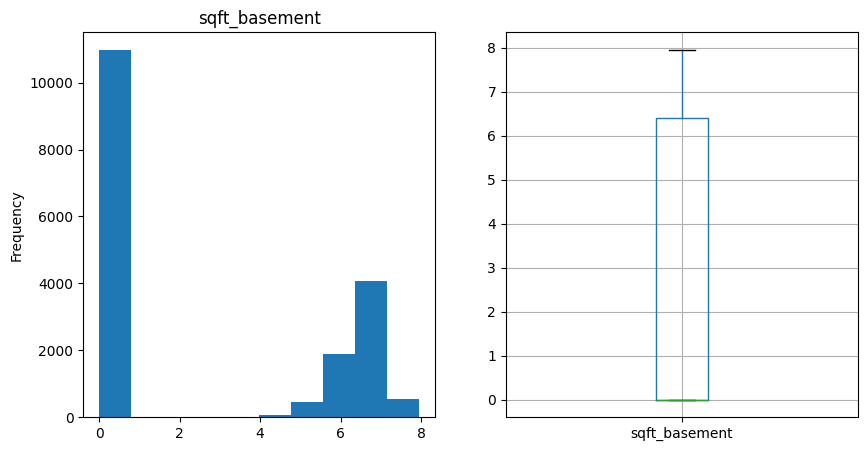

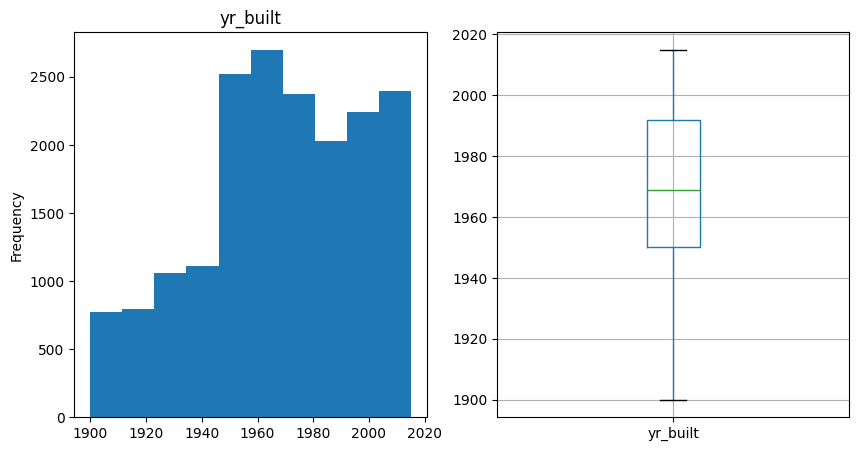

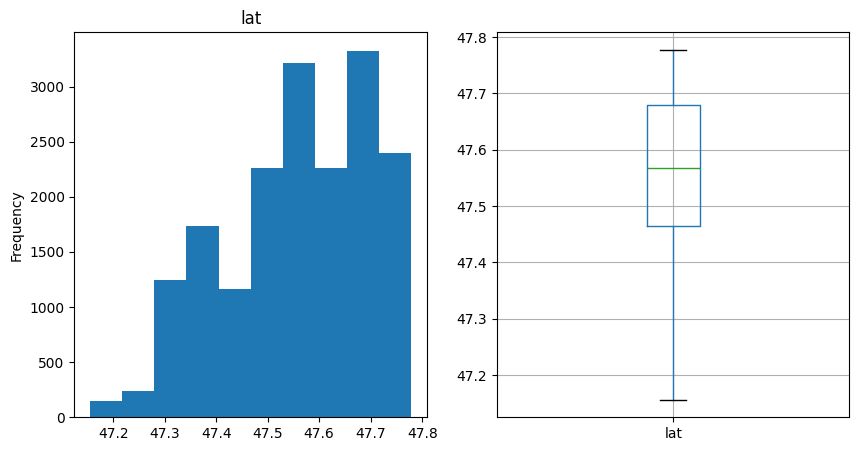

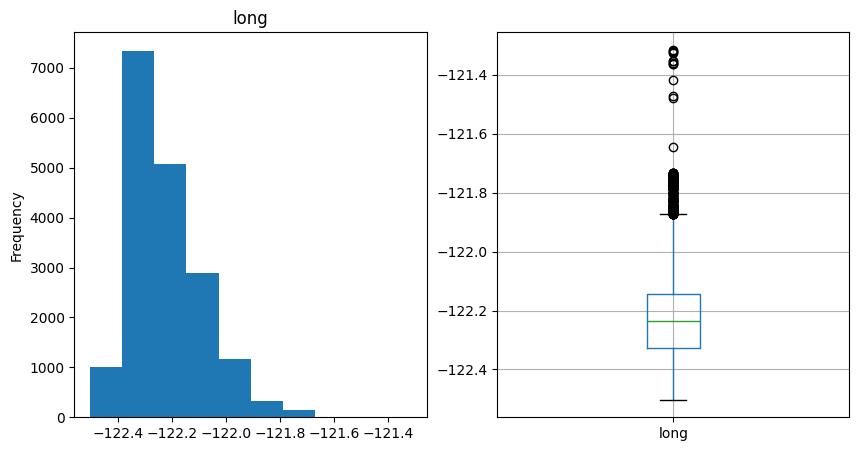

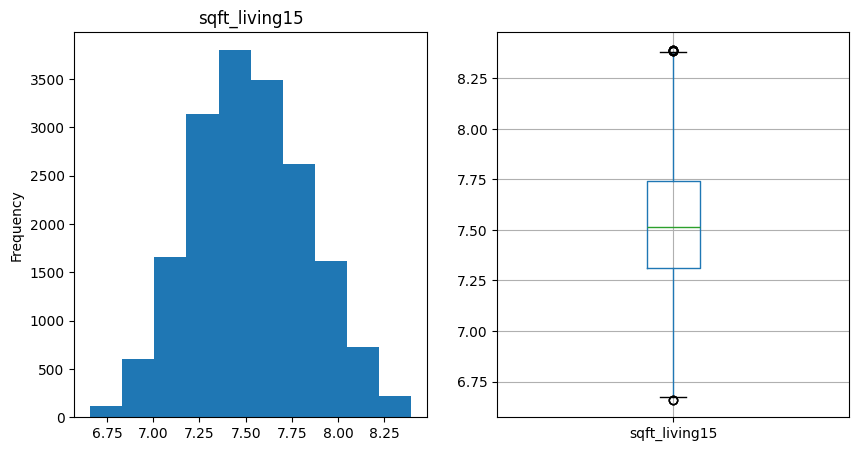

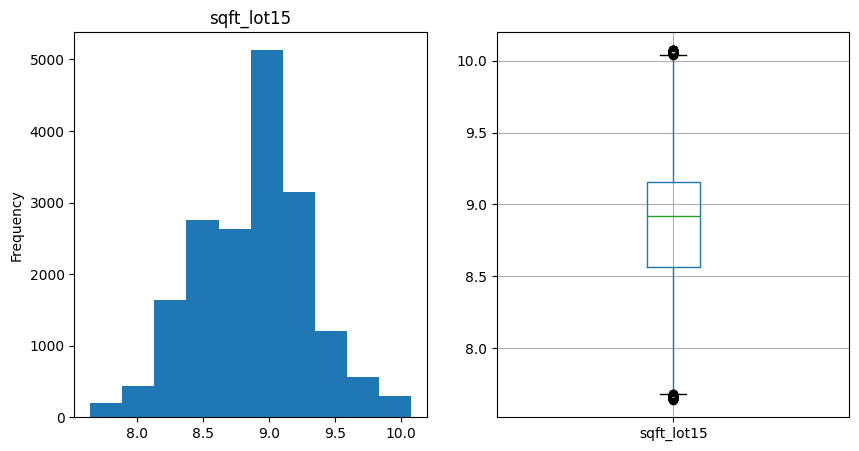

In [620]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    df[col].plot(kind='hist')
    plt.title(col)
    plt.subplot(1, 2, 2)
    df.boxplot([col])
    plt.show()

In [621]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(df.drop('price', axis=1).values)
y = df['price'].values

In [622]:
x.shape

(17990, 15)

In [623]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 43)

regressor3 = LinearRegression()
regressor3.fit(x_train, y_train)

y_pred = regressor3.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.18437114551879577
Mean Squared Error: 0.058094203673846385
Root Mean Squared Error: 0.24102739195752498
R2 Score: 0.7605017747991762


#### Remarks:
* Higher R2-Score post feature selection, transformation and outlier removal.
  